#  TAG CLOUD

### Authors
 Ndèye Gagnessiry Ndiaye and Christin Seifert  

### License
This work is licensed under the Creative Commons Attribution 3.0 Unported License https://creativecommons.org/licenses/by/3.0/ 

This notebook:

- Generates a tag cloud of Passau's Wikipedia page (https://en.wikipedia.org/wiki/Passau) with both versions: without text preprocessing and with text preprocessing.

### Requirements

- Install the Python Wordcloud package: https://pypi.python.org/pypi/wordcloud or simply use :

  ***pip install wordcloud***

- Install the Python Natural Language Toolkit (NLTK) package for natural language processing : https://pypi.python.org/pypi/nltk or simply use:

  ***pip install nltk***

In [2]:
import re
import itertools
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from math import floor

In [3]:
words_list= []
with open('Tag-cloud_Passau.txt', 'r') as f:
    for word in f.read().split():
           words_list.append(word)

## Tag cloud without text prepocessing method.

No text preprocessing step was performed. We use only the k most frequent terms.

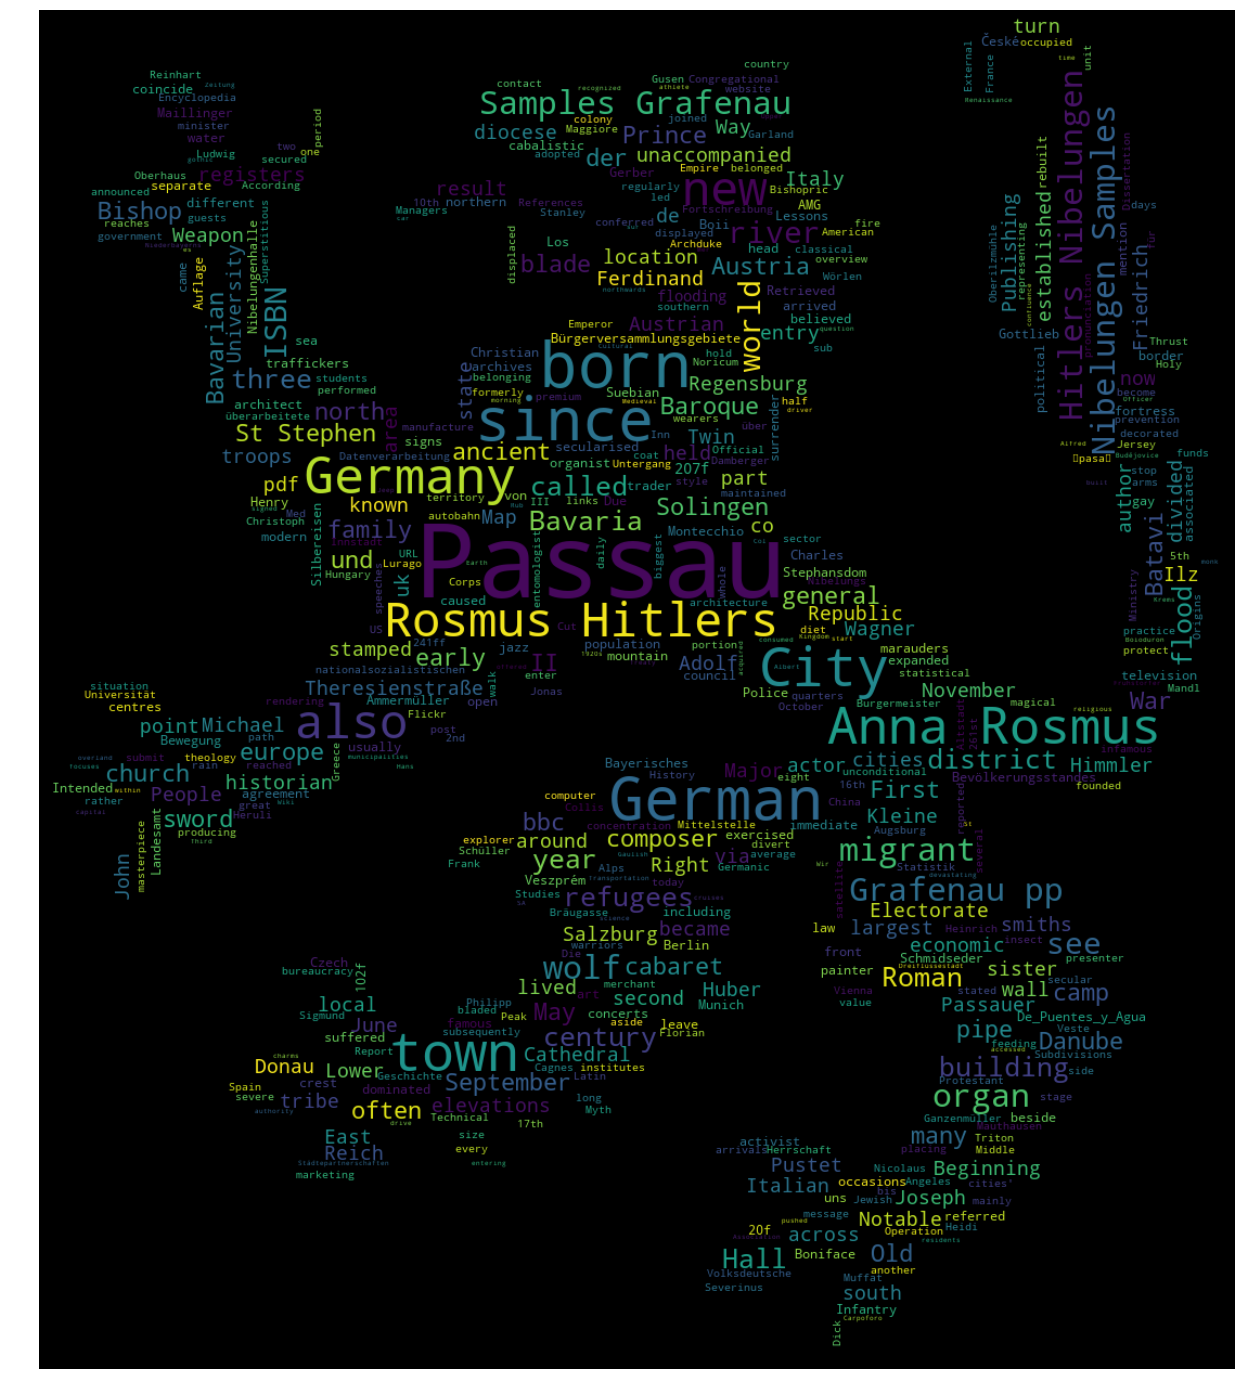

In [4]:
# Tag-cloud_Passauer-wolf.jpg from: https://de.wikipedia.org/wiki/Passauer_Wolf adapted as mask image

words_string=""
words_string= " ".join(words_list)

k= floor(len(words_list)/3)
mask = np.array(Image.open("Tag-cloud_Passauer-wolf.jpg"))

wordcloud = WordCloud(    stopwords=STOPWORDS,
                          background_color='black',
                          max_words=k,
                          mask=mask,
                         ).generate(words_string)
plt.figure(figsize=(30,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Tag cloud with text preprocessing method.

We remove the punctuations and special characters. We then apply POS tagging and take only nouns and adjectives. 

In [5]:
import nltk 
nltk.download('maxent_treebank_pos_tagger')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/teaching-hiwi/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/teaching-
[nltk_data]     hiwi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/teaching-hiwi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
def processing(string):
    #remove punctuation and special characters
    string = re.sub(r'([^\s\w]|_)+', '', string)
    return string

In [7]:
#Apply POS tagging and generate the list of nouns and adjectives
postag=[]
tag=[]
words=[]
noun_adj= []

words_list = (processing(words_string)).split() 
postag = nltk.pos_tag(words_list)
for i in postag:
     for j in i[::2]:
            words.append(j)
for i in postag:
     for j in i[1::2]:
            tag.append(j)
#Uncomment the line above when using Python 2
#for (i, j) in itertools.izip(words,tag):
#Comment the line above when using Python 2 
for (i, j) in zip(words,tag):
    if (j == "JJ")| (j == "NN") | (j == "NNP") :
        noun_adj.append(i)       

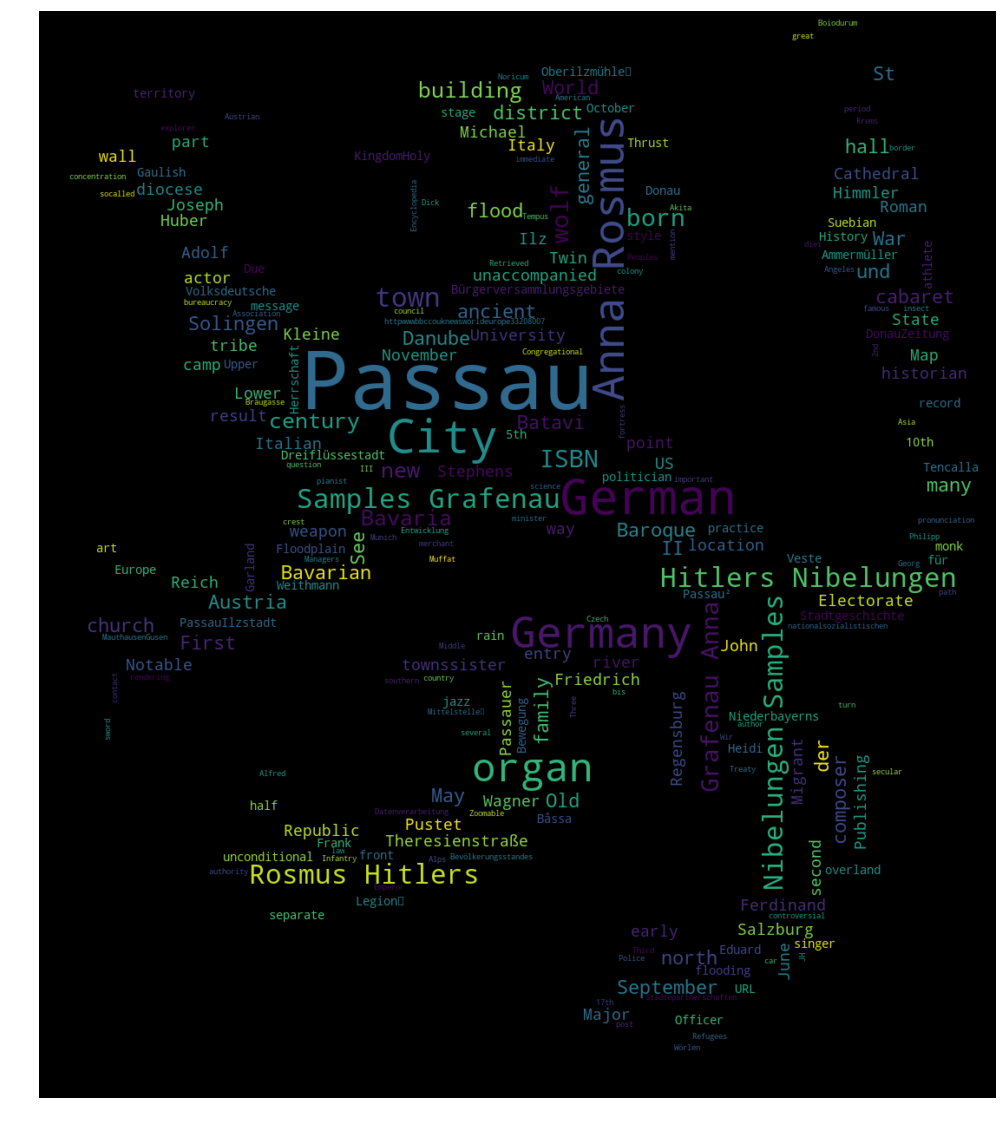

In [47]:
# Generate a tag cloud of nouns and adjectives with the most k frequent terms.

# Tag-cloud_Passauer-wolf.jpg from: https://de.wikipedia.org/wiki/Passauer_Wolf adapted as mask image

noun_adj_string= ""
noun_adj_string= " ".join(noun_adj)

k= floor(len(noun_adj )/3)
mask = np.array(Image.open("Tag-cloud_Passauer-wolf.jpg"))
wordcloud = WordCloud(    stopwords=STOPWORDS,
                          background_color='black',
                          max_words=k,
                          mask=mask,
                         ).generate(noun_adj_string)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()